In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./train.csv", parse_dates=["datetime"])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.set_index("datetime", inplace=True)
df.head()

KeyError: "None of ['datetime'] are in the columns"

월별 자전거 수요량

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


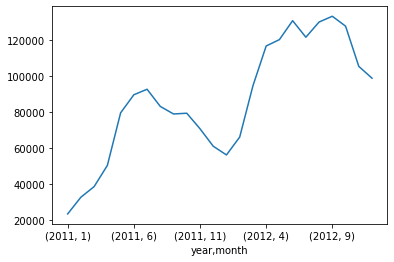

In [19]:
df["month"] = df.index.month
df["year"] = df.index.year

df.groupby(["year", "month"])["count"].sum().plot()
df.groupby(["year", "month"])["count"].sum().reset_index()

Resampling

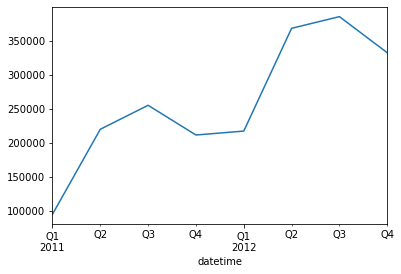

In [26]:
df["count"].resample('Q').sum().plot()

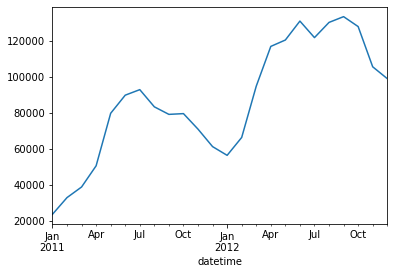

In [27]:
df["count"].resample('M').sum().plot()

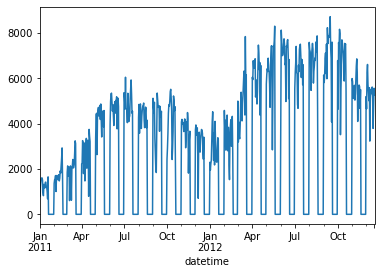

In [28]:
df["count"].resample('D').sum().plot()

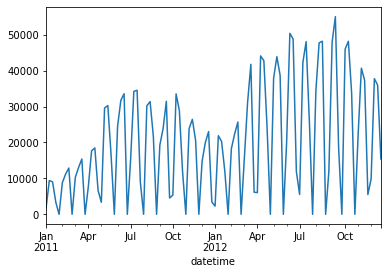

In [29]:
df["count"].resample('W').sum().plot()

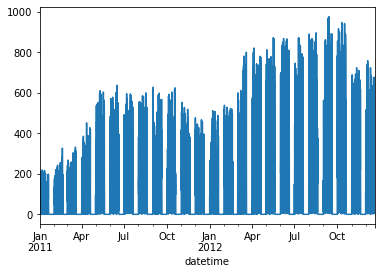

In [31]:
df["count"].resample("H").sum().plot()

In [32]:
period = pd.date_range(start="2011-01-01", end="2011-05-31", freq="M")
period

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='M')

In [33]:
df["count"].resample("M").sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
Freq: M, Name: count, dtype: int64

In [39]:
period = pd.date_range(start="2011-01-01", periods=2, freq="Y")
period

DatetimeIndex(['2011-12-31', '2012-12-31'], dtype='datetime64[ns]', freq='A-DEC')

요일별 자전거 수요량의 평균을 보고 싶다면?
- groupby 사용

,weekday,count
0,0,190.390716
1,1,189.723847
2,2,188.411348
3,3,197.296201
4,4,197.844343
5,5,196.665404
6,6,180.839772


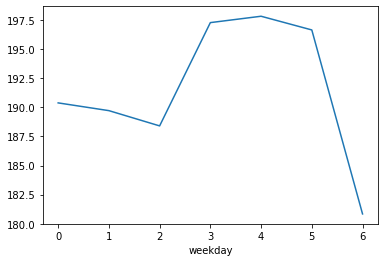

In [53]:
df["weekday"] = df.index.weekday
df.groupby(["weekday"])["count"].sum() / df.groupby(["weekday"])["count"].count()
(df.groupby(["weekday"])["count"].sum() / df.groupby(["weekday"])["count"].count()).plot()
(df.groupby(["weekday"])["count"].sum() / df.groupby(["weekday"])["count"].count()).reset_index()

In [54]:
df.groupby(["weekday"])["count"].mean()

weekday
0    190.390716
1    189.723847
2    188.411348
3    197.296201
4    197.844343
5    196.665404
6    180.839772
Name: count, dtype: float64

In [60]:
monthly_mean = df["count"].resample('M').mean()
monthly_mean

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: M, Name: count, dtype: float64

In [62]:
monthly_mean_shift = monthly_mean.shift(periods=2, fill_value=0)
monthly_mean_shift.head(4)  # 2칸씩 밀림

datetime
2011-01-31     0.000000
2011-02-28     0.000000
2011-03-31    54.645012
2011-04-30    73.641256
Freq: M, Name: count, dtype: float64

In [67]:
# 1, 6칸 밀림 확인
result = []
result.append(monthly_mean)
for period in range(1, 6):
    temp_mean = monthly_mean.shift(periods=period, fill_value=0)
    temp_mean = temp_mean.rename("{}_monthly_shift".format(period))
    result.append(temp_mean)

In [68]:
pd.concat(result, axis=1)

,count,1_monthly_shift,2_monthly_shift,3_monthly_shift,4_monthly_shift,5_monthly_shift
datetime,,,,,,
2011-01-31,54.645012,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,73.641256,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,86.849776,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,111.026374,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,174.809211,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,196.877193,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,203.614035,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,182.666667,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,174.622517,182.666667,203.614035,196.877193,174.809211,111.026374


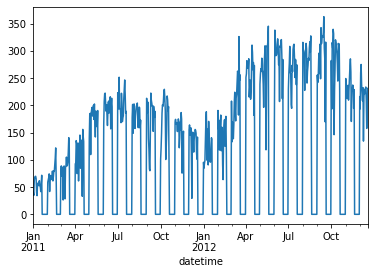

In [85]:
monthly_mean = df["count"].resample('D').mean().fillna(0)
monthly_mean.plot()

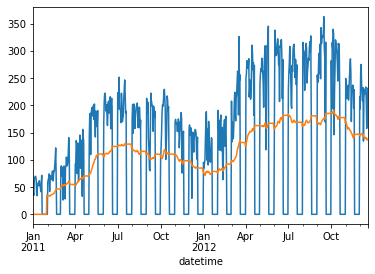

In [86]:
monthly_mean_shift = monthly_mean.rolling(window=30).mean().fillna(0)
monthly_mean.plot()
monthly_mean_shift.plot()

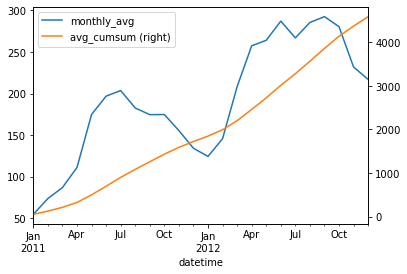

In [98]:
monthly_mean = df["count"].resample('M').mean()
cumsum_mean = df["count"].resample('M').mean().cumsum()

monthly_mean = monthly_mean.rename("monthly_avg")
cumsum_mean = cumsum_mean.rename("avg_cumsum")

df_monthly = pd.concat([monthly_mean, cumsum_mean], axis=1)
ax = df_monthly.plot(y="monthly_avg", use_index=True)
df_monthly.plot(y='avg_cumsum', secondary_y=True, ax=ax, use_index=True)